In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBRegressor, XGBClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.linear_model import Ridge

In [60]:
# Load the dataset
file_path = ("C:/Users/carme/Downloads/Global_Tech_Gadget_Consumption.csv")
df = pd.read_csv("C:/Users/carme/Downloads/Global_Tech_Gadget_Consumption.csv")

In [62]:
# Encode categorical data (Country)
label_encoder = LabelEncoder()
df['Country'] = label_encoder.fit_transform(df['Country'])

In [64]:
# Feature Engineering
# Yearly Growth Rate for Smartphone Sales
df['Smartphone Growth Rate'] = df.groupby('Country')['Smartphone Sales (Millions)'].pct_change().fillna(0)

In [66]:
# Yearly Growth Rate for 5G Penetration
df['5G Growth Rate'] = df.groupby('Country')['5G Penetration Rate (%)'].pct_change().fillna(0)

In [68]:
# Spending per Capita (Estimated as Spending / 1000 for normalization)
df['Spending per Capita'] = df['Average Consumer Spending on Gadgets ($)'] / 1000

In [69]:
# E-waste per Device Sold (E-waste / Total Gadget Sales Estimate)
df['E-waste per Device'] = df['E-Waste Generated (Metric Tons)'] / (df['Smartphone Sales (Millions)'] + df['Laptop Shipments (Millions)'])

In [70]:
# Define features and targets
features = ['Country', 'Year', 'Laptop Shipments (Millions)', 'Smartwatch Penetration (%)',
            'Average Consumer Spending on Gadgets ($)', 'E-Waste Generated (Metric Tons)',
            'Smartphone Growth Rate', '5G Growth Rate', 'Spending per Capita', 'E-waste per Device']

In [71]:
# Target variables
smartphone_target = 'Smartphone Sales (Millions)'
penetration_target = '5G Penetration Rate (%)'
gaming_target = 'Gaming Console Adoption (%)'
df['Gaming Console High Adoption'] = (df[gaming_target] >= 50).astype(int)

In [72]:
# Split data for regression models (Smartphone Sales & 5G Penetration Rate)
X_train, X_test, y_train, y_test = train_test_split(df[features], df[smartphone_target], test_size=0.2, random_state=42)
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(df[features], df[penetration_target], test_size=0.2, random_state=42)

In [73]:
# Split data for classification model (Gaming Console Adoption)
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(df[features], df['Gaming Console High Adoption'], test_size=0.2, random_state=42)

In [74]:
# Normalize numerical data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train_p = scaler.fit_transform(X_train_p)
X_test_p = scaler.transform(X_test_p)
X_train_c = scaler.fit_transform(X_train_c)
X_test_c = scaler.transform(X_test_c)

In [87]:
# Train Regression Models
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

Ridge()

In [89]:
xgb_reg = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_reg.fit(X_train_p, y_train_p)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [91]:
# Train Classification Model
rf_classifier = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rf_classifier.fit(X_train_c, y_train_c)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [93]:
# Predictions
smartphone_preds = ridge_model.predict(X_test)
penetration_preds = xgb_reg.predict(X_test_p)
gaming_preds = rf_classifier.predict(X_test_c)

In [95]:
# Evaluation
print("Smartphone Sales Prediction (Ridge Regression):")
print(f"MAE: {mean_absolute_error(y_test, smartphone_preds)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, smartphone_preds))}")
print(f"R² Score: {r2_score(y_test, smartphone_preds)}\n")

print("5G Penetration Prediction (XGBoost Regressor):")
print(f"MAE: {mean_absolute_error(y_test_p, penetration_preds)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_p, penetration_preds))}")
print(f"R² Score: {r2_score(y_test_p, penetration_preds)}\n")

print("Gaming Console Adoption Prediction (Random Forest Classifier):")
print(f"Accuracy: {accuracy_score(y_test_c, gaming_preds)}")
print("Classification Report:")
print(classification_report(y_test_c, gaming_preds))

Smartphone Sales Prediction (Ridge Regression):
MAE: 61.831219852496595
RMSE: 78.21926248191288
R² Score: 0.6324156026151294

5G Penetration Prediction (XGBoost Regressor):
MAE: 16.72034165122292
RMSE: 19.984171822376577
R² Score: 0.11669778799341912

Gaming Console Adoption Prediction (Random Forest Classifier):
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22

    accuracy                           1.00        22
   macro avg       1.00      1.00      1.00        22
weighted avg       1.00      1.00      1.00        22



C:\Users\carme\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


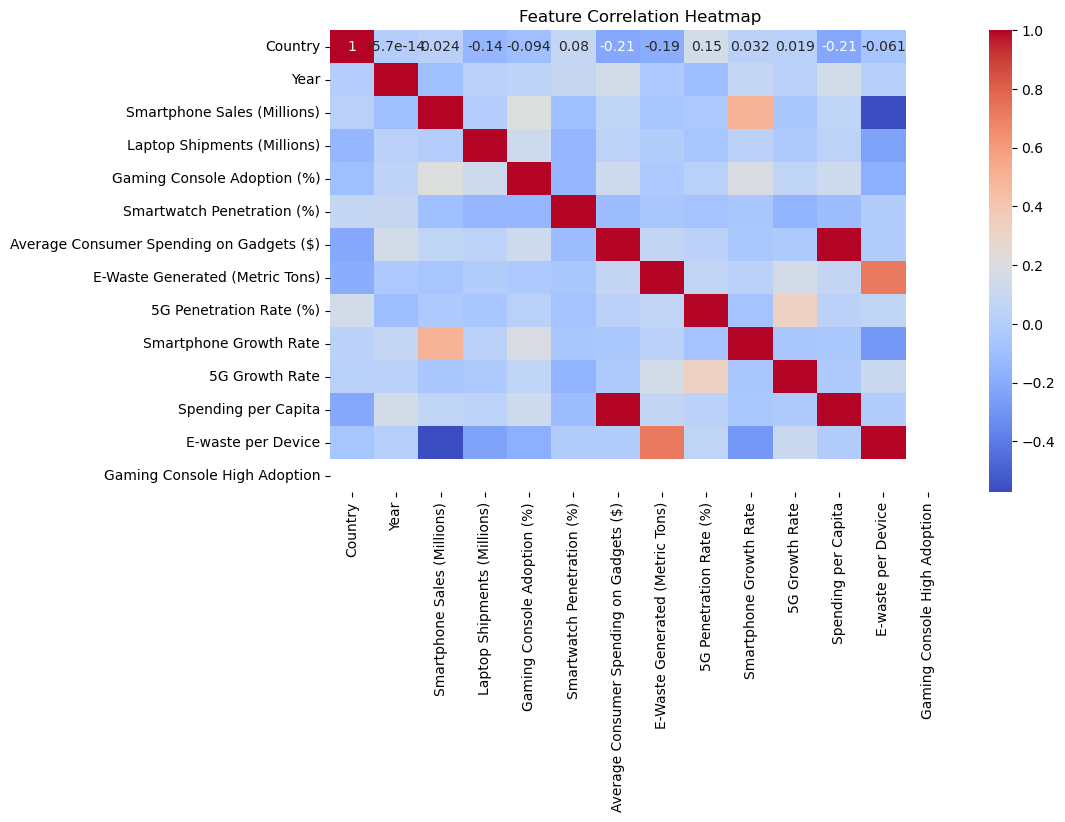

In [97]:
# Visualization
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()